In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Data Collection and Pre Processing
# 1 Load Data from csv file to a pandas datafram
raw_mail_data = pd.read_csv('./mail_data.csv')
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Replace the null values with a null string
mail_data = raw_mail_data.where(pd.notnull(raw_mail_data),'')

In [4]:
# Printing first 5 row of mail data
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Checking the number of rows and columns
mail_data.shape

(5572, 2)

In [6]:
#  Label Encoding
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1


In [7]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Seperating the text as texts and label
X = mail_data['Message']
Y = mail_data['Category']

In [9]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [10]:
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: object

In [11]:
X_Train,X_test,Y_Train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [12]:
X.shape

(5572,)

In [13]:
X_Train.shape

(4457,)

In [14]:
Y_test.shape

(1115,)

In [15]:
# Feature Extraction 
# Transform text data to feature vectors that can be used as input to the logistic regression
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

In [16]:
X_train_feature = feature_extraction.fit_transform(X_Train)
X_test_feature = feature_extraction.transform(X_test)

#  Convert Y_train and T_test as Integers

Y_Train = Y_Train.astype('int')
Y_test = Y_test.astype('int')


In [17]:
print(X_train_feature)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [18]:
X_Train

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object

In [19]:
# Training the Model
# Logistic Regression
model = LogisticRegression()


In [20]:
Y_Train

3075    1
1787    1
1614    1
4304    1
3266    0
       ..
789     0
968     1
1667    1
3321    1
1688    0
Name: Category, Length: 4457, dtype: int32

In [21]:
model.fit(X_train_feature,Y_Train)

LogisticRegression()

In [22]:
# Evaluating the Trained Model
# Predition on Training Model
prediction_on_Training_Data = model.predict(X_train_feature)
accuracy_on_training_data = accuracy_score(Y_Train,prediction_on_Training_Data)

In [23]:
print("Accuracy for Training : ",accuracy_on_training_data * 100)

Accuracy for Training :  96.70181736594121


In [24]:
# Predict on Test Data
prediction_on_Test_Data = model.predict(X_test_feature)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_Test_Data)

In [25]:
print("Accuracy for Training : ",accuracy_on_test_data * 100)


Accuracy for Training :  96.59192825112108


In [26]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [27]:
#  Building a Predictable System
input_mail = ["As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589"]

# Convert Text to feature vectors
input_data_feature = feature_extraction.transform(input_mail)

# Making Prediction
prediction = model.predict(input_data_feature)

print(prediction)

if(prediction == [1]):
    print("This is the Ham Mail.")
else:
    print("This is the Spam Mail.")


[0]
This is the Spam Mail.


In [29]:
# Create the DecisionTreeClassifier object and fit the model to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train_feature,Y_Train)


DecisionTreeClassifier()

In [30]:
# Make predictions on the test data
y_pred = clf.predict(X_test_feature)

In [31]:
print(y_pred)

[0 1 1 ... 1 1 1]


In [33]:
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 96.50%


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
model3=rf.fit(X_train_feature,Y_Train)

In [38]:
pred=model3.predict(X_test_feature)

In [39]:
print(pred)

[0 1 0 ... 1 1 1]


In [41]:
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 97.58%


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

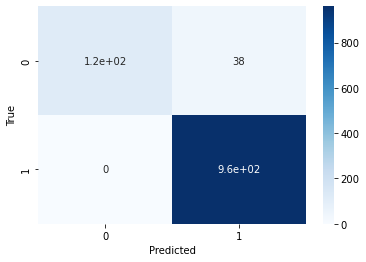

In [44]:
# Visualize the performance of the model
cm = confusion_matrix(Y_test, prediction_on_Test_Data)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
